In [63]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib
#I use TkAgg as this helps speed up plotting tremendously on Mac OS. You may want to change to GTKAgg on a Windows OS. 
#matplotlib.use('TkAgg')
#matplotlib.use('GTKAgg') 
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import specgram
from PIL import Image

In [64]:
# My version of calculating a spectrogram

def calcSpecgram(data, binSize, sRate, outputType, fileName):
    nBins = np.int_(np.floor(len(data)/binSize))
    # Create a 2D array where each row corresponds to a time bin in data
    specArray = 1. * np.arange(nBins*binSize, dtype = complex).reshape(nBins, binSize)
    # For each row/bin, FFT to obtain the spectrum for that bin
    for i in range(nBins):
        specArray[i] = np.fft.fft(data[i*binSize:(i+1)*binSize])
    # Now decide how to present the data based on outputType
    # Raw data:
    if outputType == 'data':
        return specArray
    # Image of spectrogram
    elif outputType == 'image':
        # Manipulate the data so that it can be plotted in the desired format
        # Normalize
        specArray = specArray * 1. / np.max(np.abs(specArray))
        # Transpose to put time on x-axis
        specArray = np.transpose(np.abs(specArray))
        # Take the 1/8th root so the color scheme shows low values also
        specArray = np.power(specArray, 1/8.)
        # Take only half the spectrum since the negative frequencies are redundant
        specArray = specArray[0:np.int_(binSize/2)]
        # Reverse the spectral domain so the zero frequency is at the bottom of the plot
        specArray = specArray[::-1]
        # Plot
        f = plt.figure()
        sp = f.add_subplot(111)
        sp.imshow(specArray, interpolation='nearest', cmap="viridis", aspect='auto')
        sp.set_xlabel('Time in sec')
        sp.set_ylabel('Frequency (arb)')
        # Specify the ticks and their labels: 1 every second, and 10 frequency ticks
        xTickList = np.arange(0, nBins, np.int(1.0*sRate/binSize))
        xLabelList = np.int_(np.round(np.arange(0, nBins, np.int(1.0*sRate/binSize))*binSize/sRate/1.0))
        yTickList = np.arange(np.int_(binSize/2), 0, -1*np.int_(np.int_(binSize/2)/10))
        yLabelList = (  np.int_((binSize/2)*(sRate/2)/(np.int_(binSize/2))) - 
                        np.int_(np.arange(np.int_(binSize/2), 0, -1*np.int_(np.int_(binSize/2)/10))*
                        (sRate/2)/(np.int_(binSize/2)))  )
        sp.set_xticks(xTickList)
        sp.set_xticklabels(xLabelList)
        sp.set_yticks(yTickList)
        sp.set_yticklabels(yLabelList)
        plt.title(fileName)
        plt.close()
        return f
    else:
        print('Bad outputType. Choose \'data\' or \'image\'')

In [65]:
# Class approach to define heartbeat objects

class heartbeat:
    """A class to define a heartbeat object to pull values from"""
    
    # Upon initialization, import data, sampling rate, duration
    def __init__(self, fileName):
        self.fileName = fileName
        self.pandaDF = pd.read_csv(fileName, delimiter=',')
        self.data = self.pandaDF.values
        self.data = np.reshape(self.data,len(self.data))
        self.sRate = int(self.pandaDF.columns[0])
        self.duration = self.data.size / self.sRate
    
    # Simple plotting function
    def plot(self):
        f = plt.figure()
        sp = f.add_subplot(111)
        sp.plot(self.data,'k-')
        sp.axis([0,len(self.data),min(self.data)*1.1,max(self.data)*1.1])
        sp.set_xlabel('Sample number')
        sp.set_ylabel('Signal amplitude')
        plt.title(self.fileName)
        plt.close()
        return f
    
    # Spectrogram plotting function using matplotlib's specgram function
    def spectrogram(self):
        f = plt.figure()
        sp = f.add_subplot(111)
        specgram(self.data,Fs=self.sRate)
        sp.set_xlabel('Time in sec')
        sp.set_ylabel('Frequency')
        plt.title(self.fileName)
        plt.close()
        return f

    # Specgtrogram calculation function that can plot or extract data, using my definition above
    def spectrogram2(self, binSize, outputType):
        f = calcSpecgram(self.data, binSize, self.sRate, outputType, self.fileName)
        return f

In [66]:
# Define a heartbeat object based on a normal heartbeat sound file
hb1 = heartbeat('SetA/artifact__201106212112.csv')

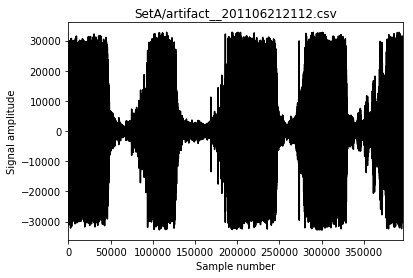

In [67]:
# Plot the waveform
hb1.plot()

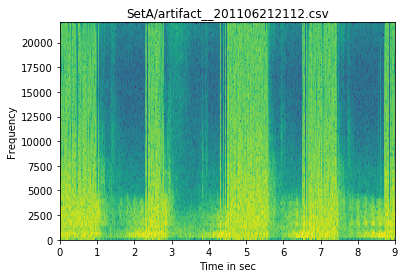

In [68]:
# Plot the spectrogram using the matplotlib specgram function
hb1.spectrogram()

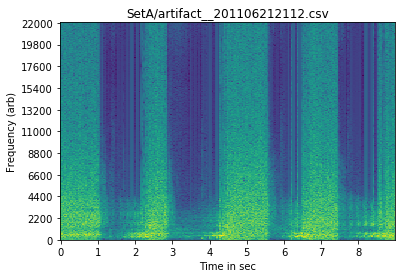

In [77]:
# Plot the spectrogram using the user defined function, with 40 msec bin size
timeBin = 0.04
sampleBinSize = int(hb1.sRate*timeBin)
hb1.spectrogram2(sampleBinSize,'image')